# backpropagation and visualization of the neural network weights



In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load datasets

data_dir = Path("data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_small_train = pd.read_csv(data_dir / "regression" / "steps-small-training.csv", index_col=0)
steps_small_test = pd.read_csv(data_dir / "regression" / "steps-small-test.csv", index_col=0)
multimodal_large_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_large_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")


# square simple train

visualisation of neural network weights will be done using a basic barplot

In [4]:
layers = [
    {"output_dim": 5, "activation": "sigmoid"},
    {"activation": "linear"}
]

mlp = networks.MLP(layers, input=square_simple_train[["x"]])


In [5]:
mlp.layers[0].weights

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864]])

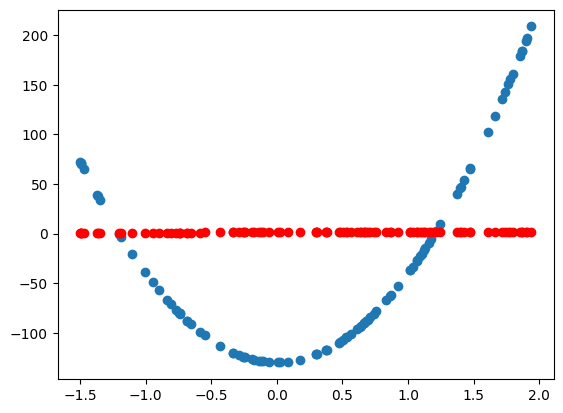

In [6]:
y_hat = mlp.full_forward_pass(square_simple_train[["x"]].T)

plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], y_hat.T, color="red")

In [7]:
mlp.layers[0].weights[:, 0]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

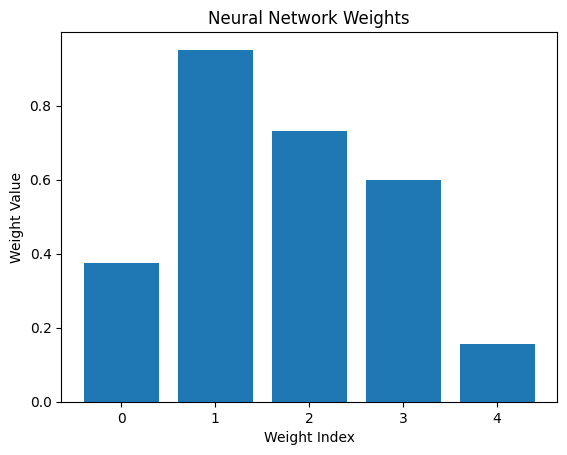

In [8]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

[0.15599452]
[0.05808361]
[0.86617615]
[0.60111501]
[0.70807258]


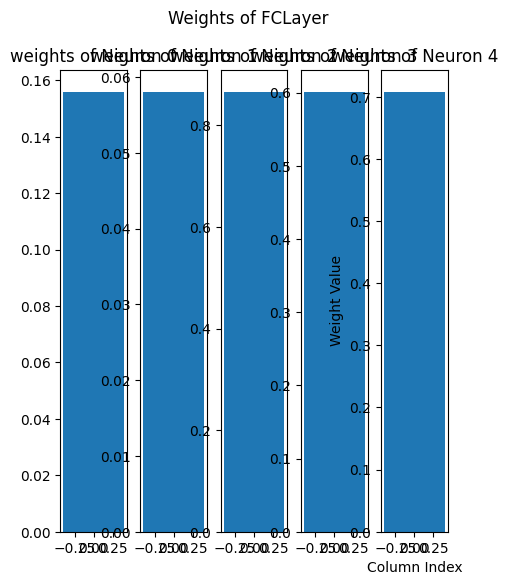

In [11]:
mlp.layers[1].plot_weights()

now we want to calculate the partial derivative over the layers


In [53]:
dw, db = mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy(), return_grads=True)
mlp.layers[0].weights -= 1 * dw[0]
mlp.layers[0].bias -= 1 * db[0]

Text(0.5, 1.0, 'Neural Network Weight Gradients')

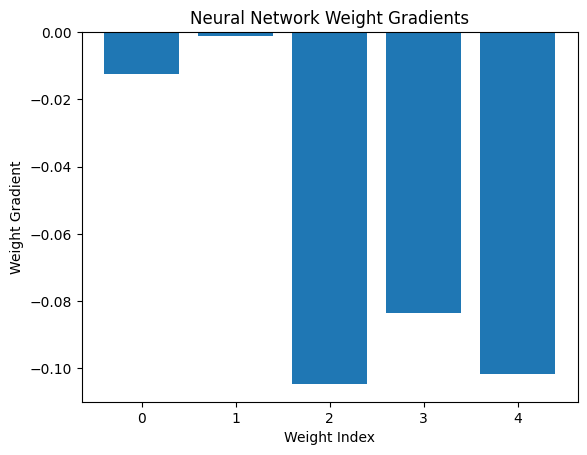

In [55]:
# plot dw[0]
plt.bar(range(len(dw[0])), dw[0][:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Gradient')
plt.title('Neural Network Weight Gradients')

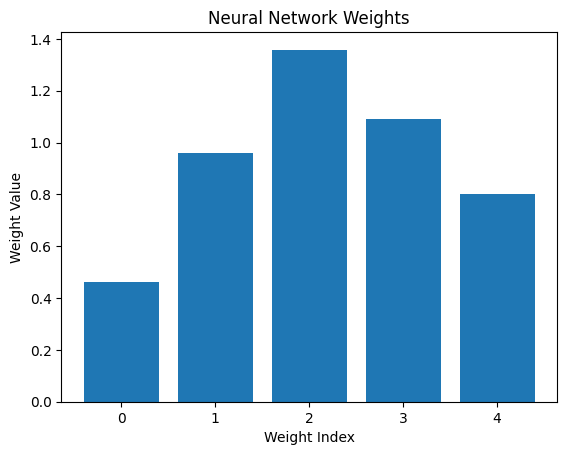

In [56]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

In [12]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

Epoch: 0, Loss: 2.2155581194469103
Epoch: 100, Loss: 2.083692096732131
Epoch: 200, Loss: 1.966109863599715
Epoch: 300, Loss: 1.8610704894174512
Epoch: 400, Loss: 1.7670746401152235
Epoch: 500, Loss: 1.6828263976965678
Epoch: 600, Loss: 1.6072018669344472
Epoch: 700, Loss: 1.5392232353212185
Epoch: 800, Loss: 1.4780372375012794
Epoch: 900, Loss: 1.4228971951424523
Epoch: 1000, Loss: 1.3731479734457661
Epoch: 1100, Loss: 1.328213328106377
Epoch: 1200, Loss: 1.287585220379788
Epoch: 1300, Loss: 1.2508147596337198
Epoch: 1400, Loss: 1.2175044974050264
Epoch: 1500, Loss: 1.1873018483512667
Epoch: 1600, Loss: 1.159893454501877
Epoch: 1700, Loss: 1.135000342109812
Epoch: 1800, Loss: 1.1123737469040316
Epoch: 1900, Loss: 1.0917915049808642
Epoch: 2000, Loss: 1.0730549239865446
Epoch: 2100, Loss: 1.0559860634457428
Epoch: 2200, Loss: 1.0404253647190627
Epoch: 2300, Loss: 1.0262295806286652
Epoch: 2400, Loss: 1.0132699626733286
Epoch: 2500, Loss: 1.0014306702786517
Epoch: 2600, Loss: 0.990607371

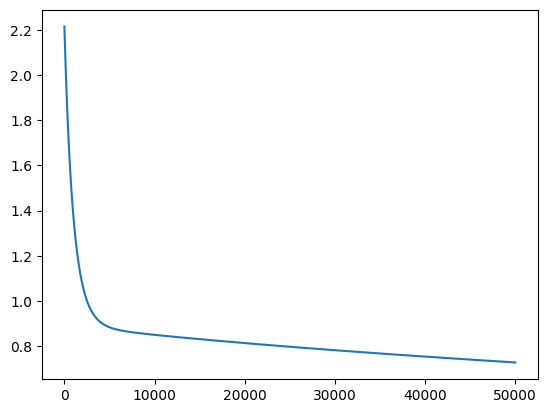

In [13]:
losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), 0.01, 50000)

plt.plot(losses)

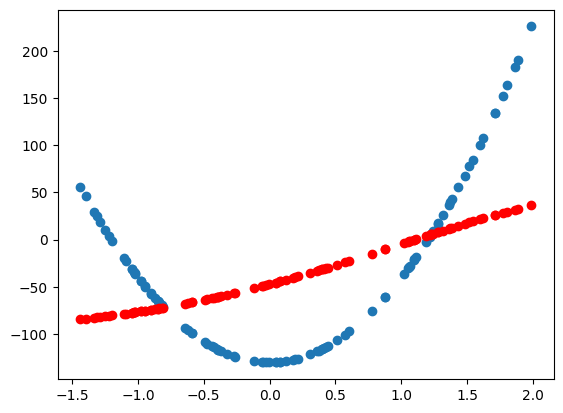

In [15]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

In [16]:
square_simple_test_norm["y"].shape
y_hat.flatten().shape


(100,)

In [17]:
mse = np.mean((square_simple_test["y"] - norm.denorm(y_hat.T, index="y").flatten())**2)
mse

4995.076056303639

In [31]:
weights = mlp.layers[0].weights

weights

array([[ 1.35642417],
       [ 1.78200425],
       [ 1.37229551],
       [ 1.46114819],
       [ 0.33742435],
       [ 1.27661647],
       [-1.56328194],
       [ 1.49939525],
       [ 1.35626665],
       [ 1.46675003],
       [-1.57343525],
       [ 2.88981463],
       [ 1.46442342],
       [ 1.25340459],
       [ 0.5085176 ]])

more layers

In [18]:
layers = [
    {"output_dim": 15, "activation": "sigmoid", "init": "uniform"},
    {"output_dim": 5, "activation": "sigmoid", "init": "uniform"},
    {"activation": "linear"}
]

norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

mlp = networks.MLP(layers, input=square_simple_train_norm[["x"]])

Epoch: 0, Loss: 5.045975364993687
Epoch: 100, Loss: 0.9898105565948622
Epoch: 200, Loss: 0.9938764719815413
Epoch: 300, Loss: 0.9848114142015524
Epoch: 400, Loss: 0.9868770076359644
Epoch: 500, Loss: 0.9884432943891713
Epoch: 600, Loss: 0.9738847576240016
Epoch: 700, Loss: 0.9651992731751693
Epoch: 800, Loss: 0.9477559839947465
Epoch: 900, Loss: 0.9449499646584986
Epoch: 1000, Loss: 0.8605933334767317
Epoch: 1100, Loss: 0.741503697551402
Epoch: 1200, Loss: 0.6512568479594083
Epoch: 1300, Loss: 0.5558996181648419
Epoch: 1400, Loss: 0.4908928837318856
Epoch: 1500, Loss: 0.4441259352561179
Epoch: 1600, Loss: 0.40544769808876985
Epoch: 1700, Loss: 0.377744509520181
Epoch: 1800, Loss: 0.35806812631055424
Epoch: 1900, Loss: 0.34298617096743356
Epoch: 2000, Loss: 0.3291814825367424
Epoch: 2100, Loss: 0.31889044392130134
Epoch: 2200, Loss: 0.31149582721012703
Epoch: 2300, Loss: 0.305600455468395
Epoch: 2400, Loss: 0.29869450077065446
Epoch: 2500, Loss: 0.2943977305616008
Epoch: 2600, Loss: 0.2

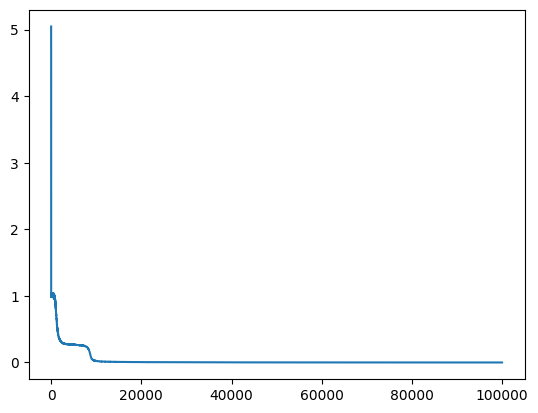

In [19]:
losses = mlp.minibatch_train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.05, epochs=100000, batch_size=16)
plt.plot(losses)

MSE on test data:  1.0547244040288977


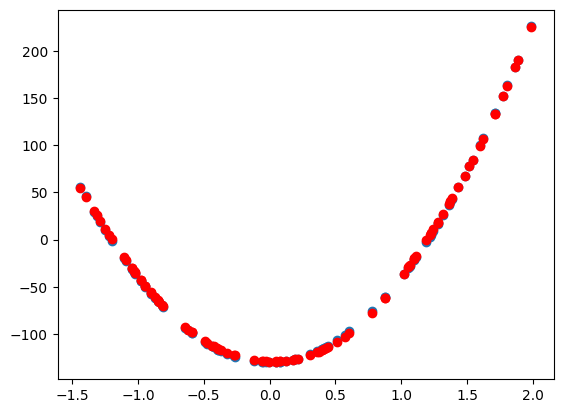

In [20]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

y_hat_denorm = norm.denorm(y_hat.T, index="y").flatten()
plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], y_hat_denorm, color="red")

mse = np.mean((square_simple_test["y"] - y_hat_denorm)**2)
print("MSE on test data: ", mse)

thats enough small MSE

## steps small 

In [21]:
layers = [
    {"output_dim": 10, "activation": "relu", "init_method": "he"},
    {"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 5, "activation": "sigmoid", "init_method": "uniform"},

    {"activation": "linear"}
]

norm_steps = networks.assets.Normalizator(steps_small_train)
steps_small_train_norm = norm_steps(steps_small_train)
steps_small_test_norm = norm_steps(steps_small_test)

mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


Epoch: 0, Loss: 1.8382893071976065
Epoch: 100, Loss: 0.5617882332420897
Epoch: 200, Loss: 0.3965649458062755
Epoch: 300, Loss: 0.2847807648964449
Epoch: 400, Loss: 0.2265645874939475
Epoch: 500, Loss: 0.20124539183030188
Epoch: 600, Loss: 0.1905387070623842
Epoch: 700, Loss: 0.18500970365251257
Epoch: 800, Loss: 0.18109542166922835
Epoch: 900, Loss: 0.1773268752300693
Epoch: 1000, Loss: 0.16501393487553503
Epoch: 1100, Loss: 0.14999559011076577
Epoch: 1200, Loss: 0.14303734491567047
Epoch: 1300, Loss: 0.13765349580779276
Epoch: 1400, Loss: 0.13256770808791737
Epoch: 1500, Loss: 0.12809901070728402
Epoch: 1600, Loss: 0.12391668261613914
Epoch: 1700, Loss: 0.11906931743084949
Epoch: 1800, Loss: 0.11530565799464697
Epoch: 1900, Loss: 0.11227106070558605
Epoch: 2000, Loss: 0.10883686514136309
Epoch: 2100, Loss: 0.10459054709606283
Epoch: 2200, Loss: 0.10107638562665908
Epoch: 2300, Loss: 0.09734265894943034
Epoch: 2400, Loss: 0.09368431800164183
Epoch: 2500, Loss: 0.09053305780402816
Epoch

Text(0.5, 1.0, 'Training Loss')

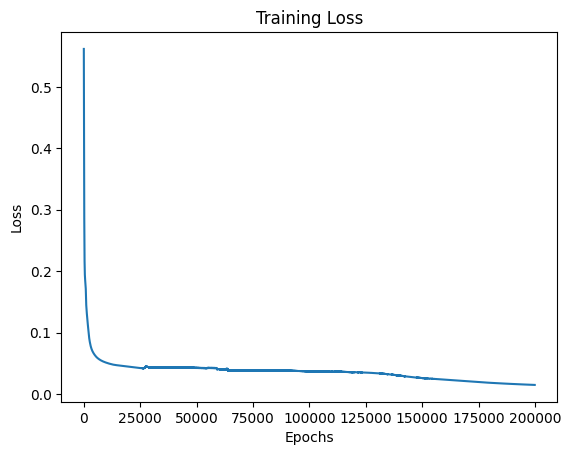

In [24]:
mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


losses = mlp_steps.train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 0.5, 200000)
# losses = mlp_steps.minibatch_train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on train data:  96.08780712879876


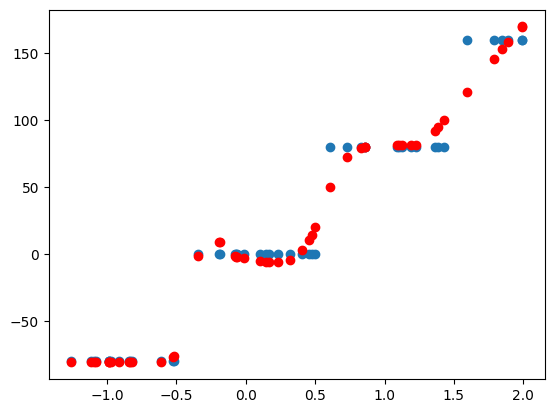

In [26]:
y_hat = mlp_steps.full_forward_pass(steps_small_train_norm[["x"]].T)

plt.scatter(steps_small_train["x"], steps_small_train["y"])
plt.scatter(steps_small_train["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_train["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on train data: ", mse)

MSE on test data:  211.95513907452516


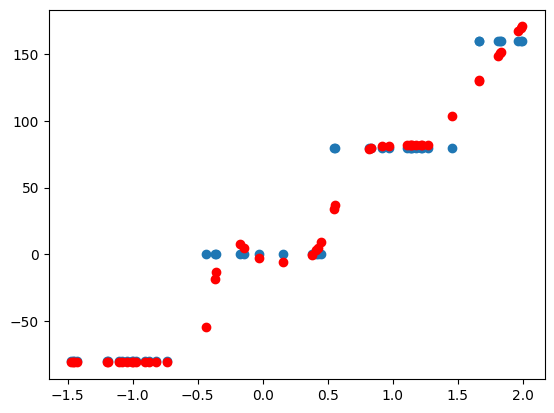

In [25]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T)

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

In [33]:
import pickle
# Specify the file path where you want to save the pickle file
file_path = "steps_weights.pkl"

# Save the weights_global variable as a pickle file
with open(file_path, "rb") as file:
    weights_global = pickle.load(file)

for i in range(len(mlp_steps.layers)):
    print("Layer ", i)
    print("Weights: ", weights_global[i][0].shape)
    print("Biases: ", weights_global[i][1].shape)
    mlp_steps.layers[i].weights = weights_global[i][0]
    mlp_steps.layers[i].biases = weights_global[i][1]

Layer  0
Weights:  (10, 1)
Biases:  (10, 1)
Layer  1
Weights:  (3, 10)
Biases:  (3, 1)
Layer  2
Weights:  (3, 3)
Biases:  (3, 1)
Layer  3
Weights:  (5, 3)
Biases:  (5, 1)
Layer  4
Weights:  (1, 5)
Biases:  (1, 1)


MSE on test data:  58836.411861522254


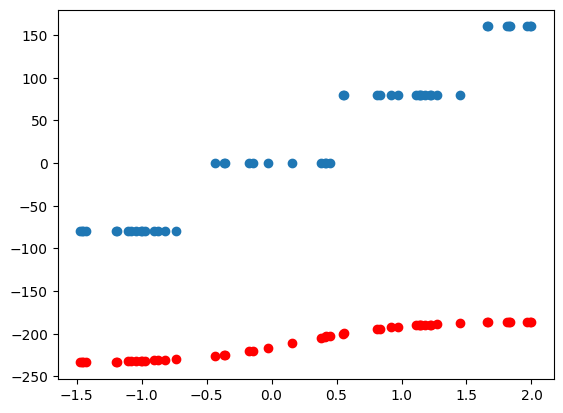

In [34]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T)

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

# Multimodal large

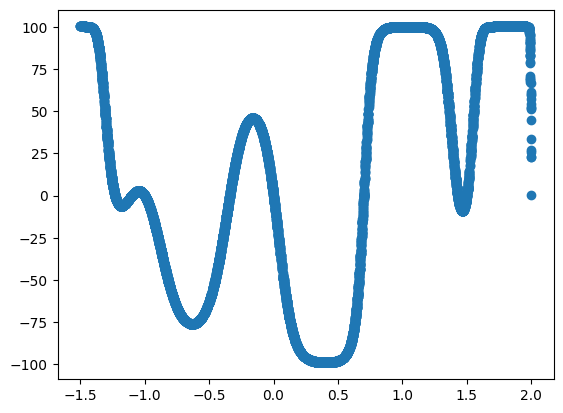

In [5]:

norm_multimodal = networks.assets.Normalizator(multimodal_large_train)

multimodal_large_train_norm = norm_multimodal(multimodal_large_train)
multimodal_large_test_norm = norm_multimodal(multimodal_large_test)

plt.scatter(multimodal_large_train["x"], multimodal_large_train["y"])

In [17]:
layers = [
    {"output_dim": 50, "activation": "relu", "init_method": "uniform"},
    {"output_dim": 5, "activation": "relu", "init_method": "uniform"},
    {"activation": "linear"}
]



mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]])


losses = mlp_multimodal.minibatch_stochastic_train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), 0.01, 10000, 256)

Epoch: 0, Loss: 278.163091264951
Epoch: 100, Loss: 7.061809838840833
Epoch: 200, Loss: 3.180952969785314
Epoch: 300, Loss: 2.113235666721205
Epoch: 400, Loss: 1.672198101145657
Epoch: 500, Loss: 1.4239250529189669
Epoch: 600, Loss: 1.2731565588502964
Epoch: 700, Loss: 1.1768004015293079
Epoch: 800, Loss: 1.1088362591476708
Epoch: 900, Loss: 1.059934458138416
Epoch: 1000, Loss: 1.0238737406257543
Epoch: 1100, Loss: 0.9977479496379718
Epoch: 1200, Loss: 0.9762101174974892
Epoch: 1300, Loss: 0.9589356025755292
Epoch: 1400, Loss: 0.9447353715327785
Epoch: 1500, Loss: 0.9336041907629126
Epoch: 1600, Loss: 0.9238762093598883
Epoch: 1700, Loss: 0.9156879723134894
Epoch: 1800, Loss: 0.9089191379324512
Epoch: 1900, Loss: 0.9029047718941685
Epoch: 2000, Loss: 0.8976738005569254
Epoch: 2100, Loss: 0.8932369830771247
Epoch: 2200, Loss: 0.8894259640536438
Epoch: 2300, Loss: 0.8861939574944699
Epoch: 2400, Loss: 0.8834409679896295
Epoch: 2500, Loss: 0.8810376454256209
Epoch: 2600, Loss: 0.8789433502

In [7]:
losses = mlp_multimodal.minibatch_stochastic_train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), 0.1, 10000, 128)

Epoch: 0, Loss: 0.8348780656829855
Epoch: 100, Loss: 0.833963237493039
Epoch: 200, Loss: 0.8331765573517687
Epoch: 300, Loss: 0.8324409278909396
Epoch: 400, Loss: 0.8318928386700126
Epoch: 500, Loss: 0.8314621990413383
Epoch: 600, Loss: 0.8311528706123896
Epoch: 700, Loss: 0.8308603311486222
Epoch: 800, Loss: 0.8305555911508423
Epoch: 900, Loss: 0.830315400293811
Epoch: 1000, Loss: 0.830094760890424
Epoch: 1100, Loss: 0.8299255770775728
Epoch: 1200, Loss: 0.8298033056043443
Epoch: 1300, Loss: 0.8295962433886002
Epoch: 1400, Loss: 0.8294145193929929
Epoch: 1500, Loss: 0.8292440505311811
Epoch: 1600, Loss: 0.8290189788643886
Epoch: 1700, Loss: 0.8287744096984916
Epoch: 1800, Loss: 0.828551010451999
Epoch: 1900, Loss: 0.8282930667998413
Epoch: 2000, Loss: 0.8279944090897865
Epoch: 2100, Loss: 0.8276924728043515
Epoch: 2200, Loss: 0.8272900469929616
Epoch: 2300, Loss: 0.826847069138058
Epoch: 2400, Loss: 0.8262935030529867
Epoch: 2500, Loss: 0.8256467704831343
Epoch: 2600, Loss: 0.82489081

KeyboardInterrupt: 

Text(0.5, 1.0, 'Training Loss')

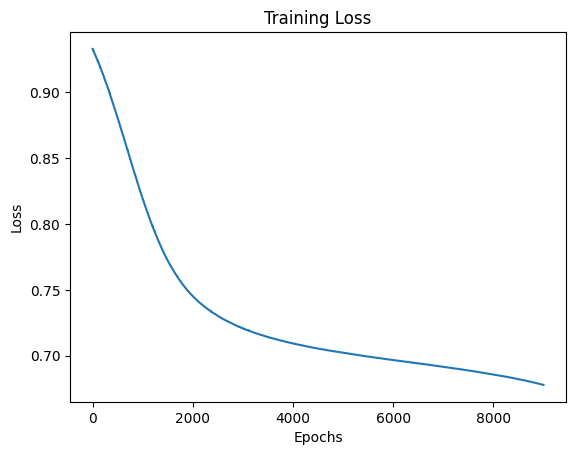

In [13]:
plt.plot(losses[1000:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on test data:  3548.9142828876847


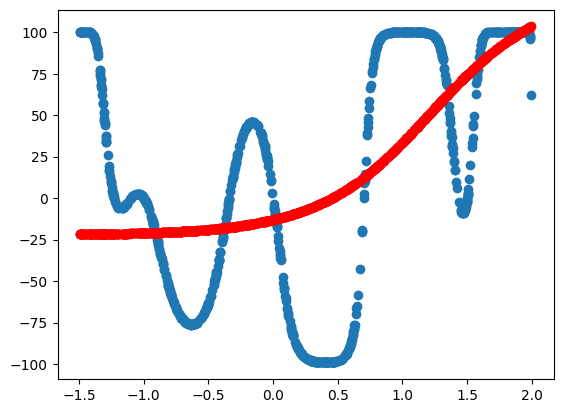

In [14]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T)

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)